In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import psycopg2
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

Loading the dataset

In [19]:
#creating database connection
conn = psycopg2.connect(
    dbname="inventory",
    user="postgres",
    password="Rpsingh123",
    host="localhost",
    port="5432"
)

# Fetching vendor summary data
df=pd.read_sql("Select * from vendor_sales_summary", conn)
df.head()



,VendorNumber,VendorName,Brand,Description,PurchasePrice,actualprice,Volume,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,GrossProfit,Profitmargin,StockTurnover,SalestoPurchaseRatio
0,1128.0,BROWN-FORMAN CORP,1233.0,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425.0,MARTIGNETTI COMPANIES,3405.0,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035.0,PERNOD RICARD USA,8068.0,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960.0,DIAGEO NORTH AMERICA INC,4261.0,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960.0,DIAGEO NORTH AMERICA INC,3545.0,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


Exploratory Data Analysis

1. Preciously we examined the various tables in the databse to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

2. In this phase of EDA, we will analyze the resultant table to gain insights into the distn of each column. This will help us understand data patterns, idetify anomalies, and ensure data quality before proceeding with further analysis.

In [20]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
actualprice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
totalpurchasequantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
totalpurchasedollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totalsalesquantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
totalsalesdollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalsalesprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [ ]:
print(df.dtypes)

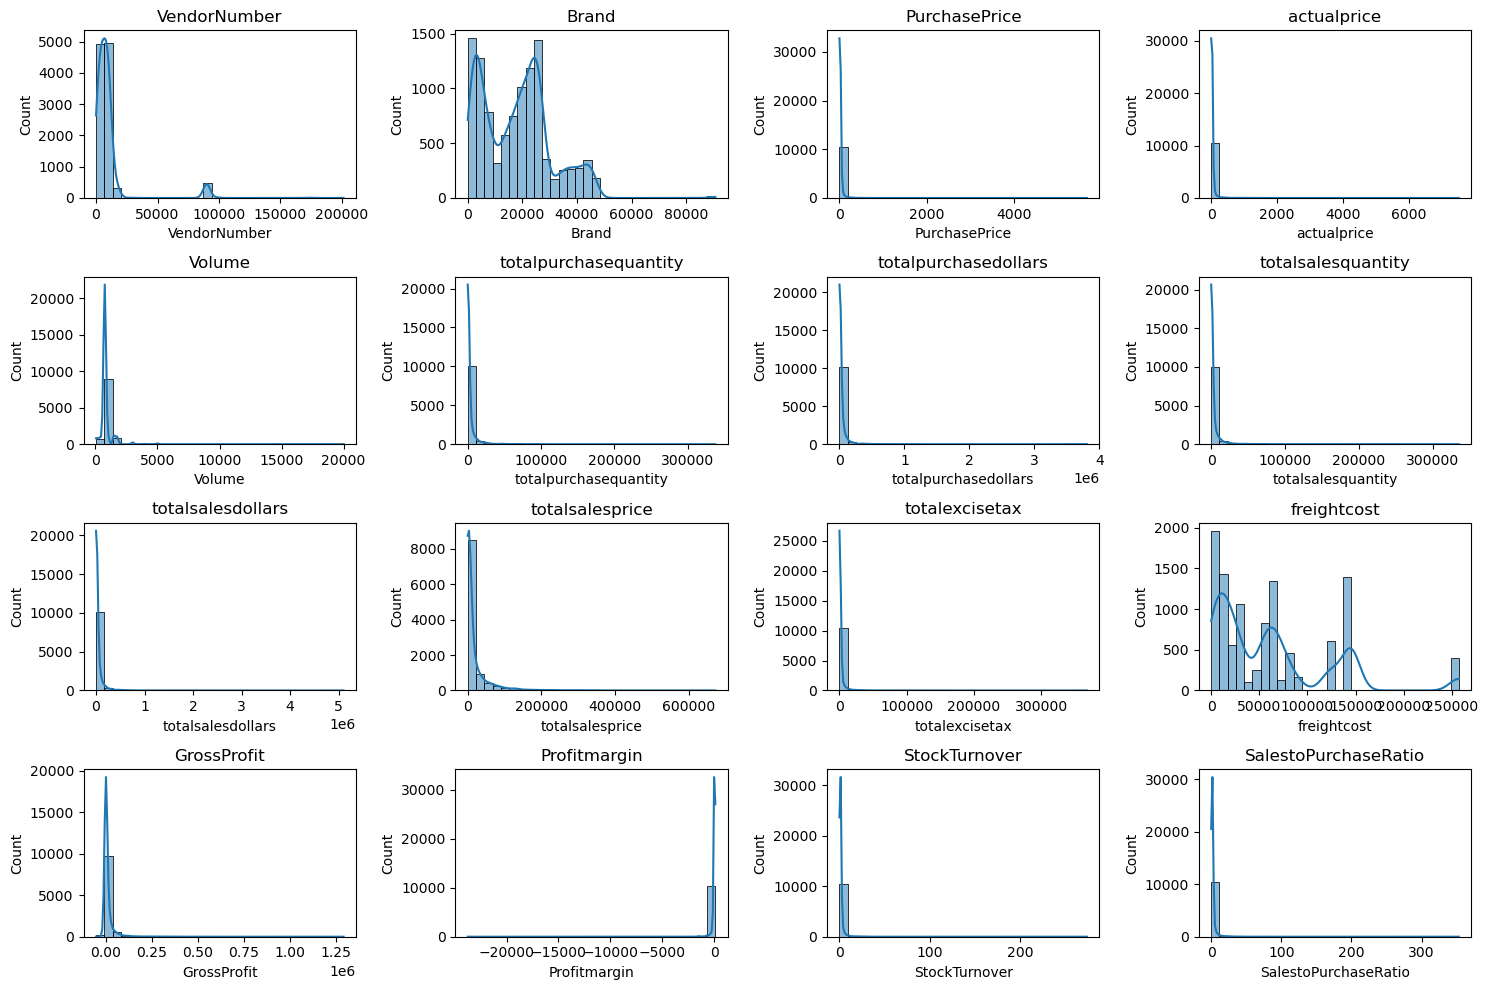

In [21]:
# Distn plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))   # assign figure to a variable
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()   # this should display the figure properly

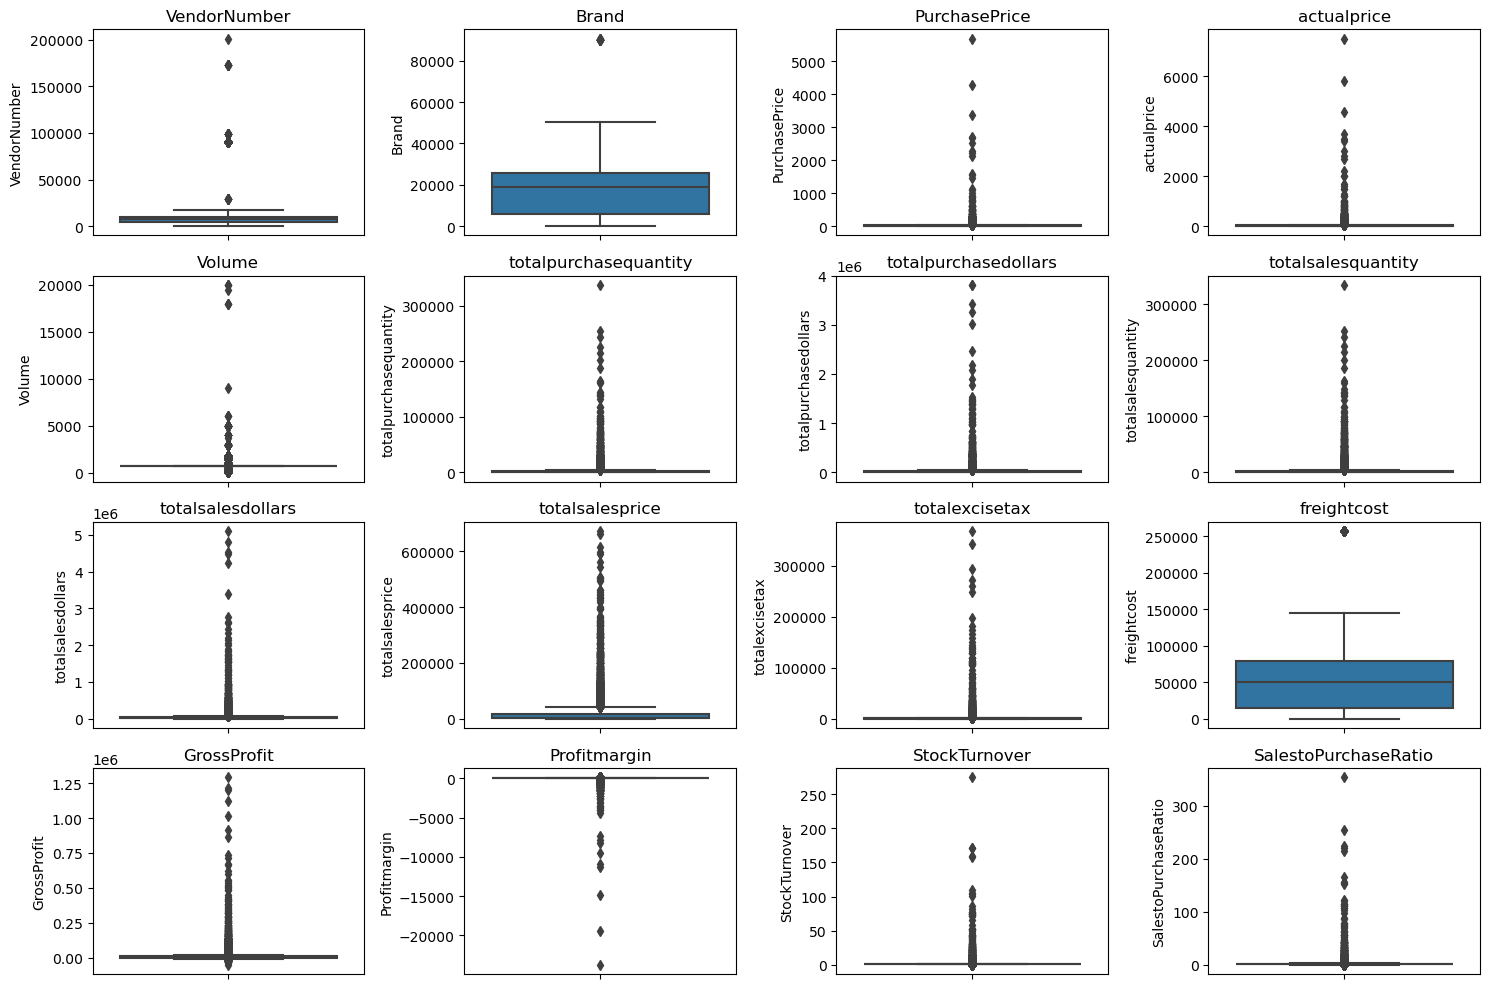

In [52]:
# Outlier detection with Boxplots
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Summary Statistics Insights:

Negative and zero values:

1. Gross Profit: Mini. value is -52002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
2. Profit margin: Has a mini. of -inf, which suggests cases where revenue is zero or even lower than costs..
3. Total sales quantity & sales dollars: Mini. values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

Outliers Indicated by High Standard Deviations:

1. Purchase & Actual Prices: The max value(5681.87 & 7499.99) are significantly higher than the mean(24.39 & 35.64), indicating potential premium products.
2. Freight Cost: Huge variations, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
3. Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [30]:
# let's filter the data by removing inconsistencies
df = pd.read_sql("""
    SELECT *
    FROM vendor_sales_summary
    WHERE "GrossProfit">0
    AND "Profitmargin">0
    AND "totalsalesquantity">0""", conn)
# df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8564.0,10107.074965,17635.714818,2.000000,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8564.0,17614.670131,12946.130933,58.000000,5375.750000,17606.000000,24935.250000,9.063100e+04
PurchasePrice,8564.0,21.780897,81.189624,0.360000,6.660000,10.060000,17.850000,3.352930e+03
actualprice,8564.0,32.297467,112.420744,0.490000,9.990000,14.990000,25.990000,4.559990e+03
Volume,8564.0,864.332263,724.240079,50.000000,750.000000,750.000000,750.000000,2.000000e+04
totalpurchasequantity,8564.0,3772.008991,12276.960631,1.000000,42.000000,431.000000,2666.750000,3.376600e+05
totalpurchasedollars,8564.0,35887.253324,136722.999153,0.710000,546.187500,5018.400000,26610.177500,3.811252e+06
totalsalesquantity,8564.0,3748.983419,12125.696083,1.000000,62.000000,490.500000,2675.000000,3.349390e+05
totalsalesdollars,8564.0,51542.278077,186071.489729,1.980000,1355.580000,8483.780000,40622.112500,5.101920e+06
totalsalesprice,8564.0,22759.270732,49305.274018,0.990000,584.790000,4549.755000,22595.252500,6.728193e+05


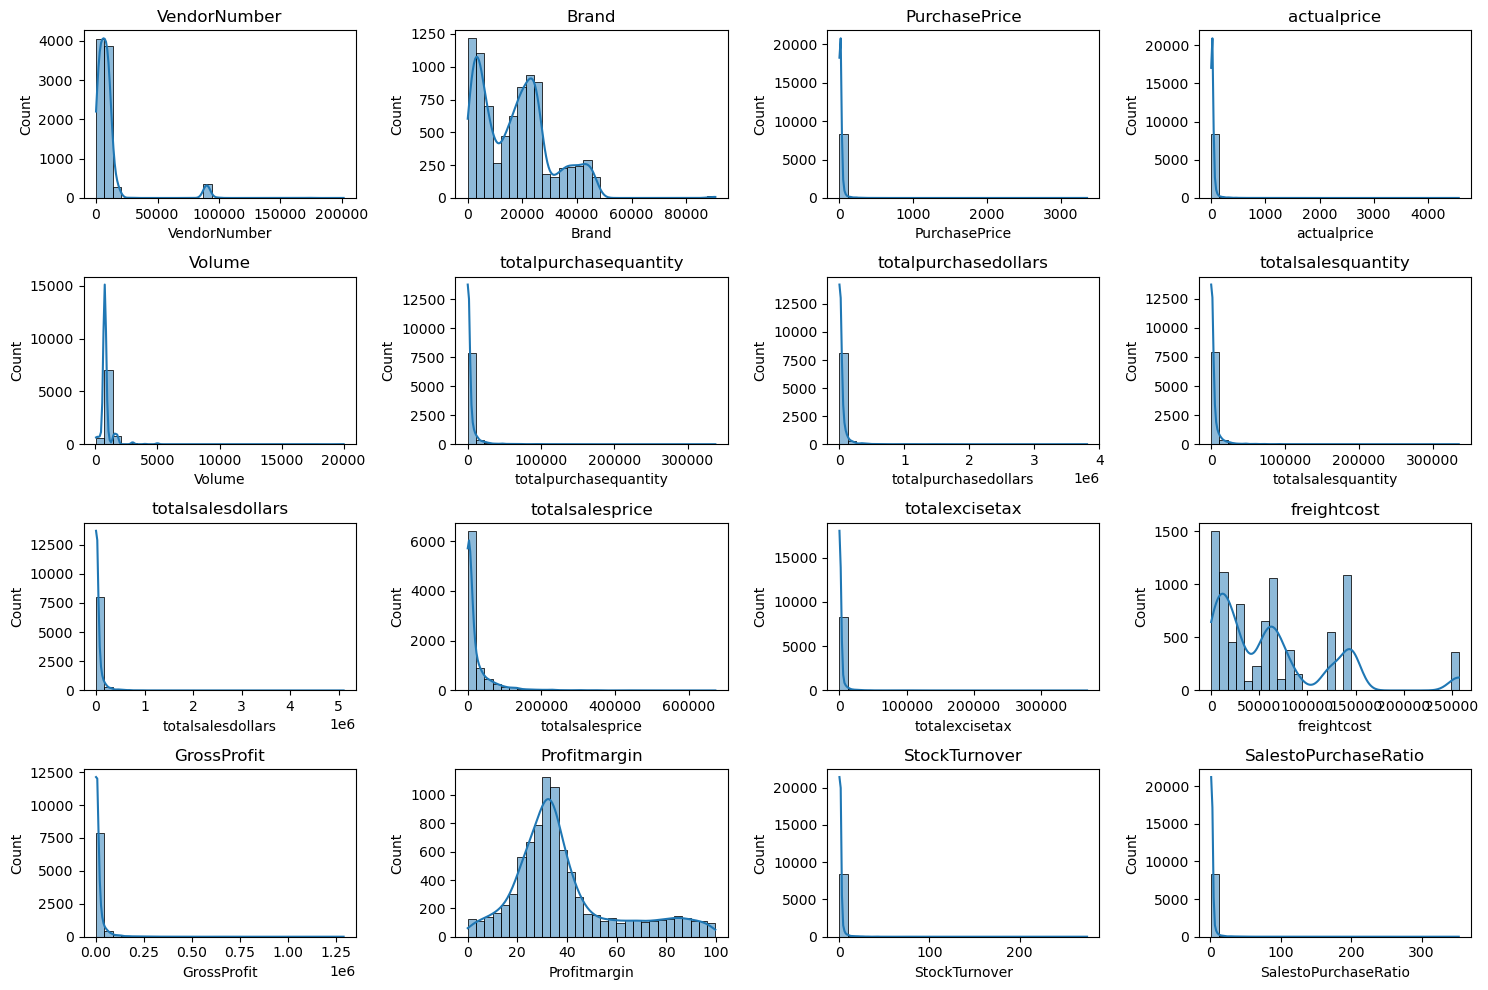

In [31]:
# Distn plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))   # assign figure to a variable
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()   # this should display the figure properly

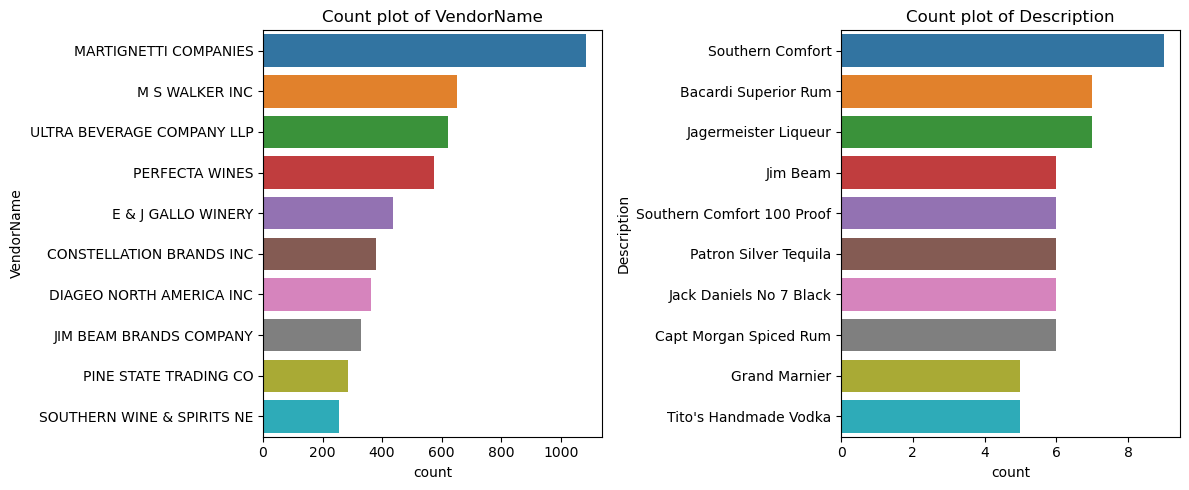

In [32]:
# Count plots for categorical columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    top_categories = df[col].value_counts().index[:10]   # top 10 categories
    sns.countplot(y=col, data=df, order=top_categories)  # use order
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()



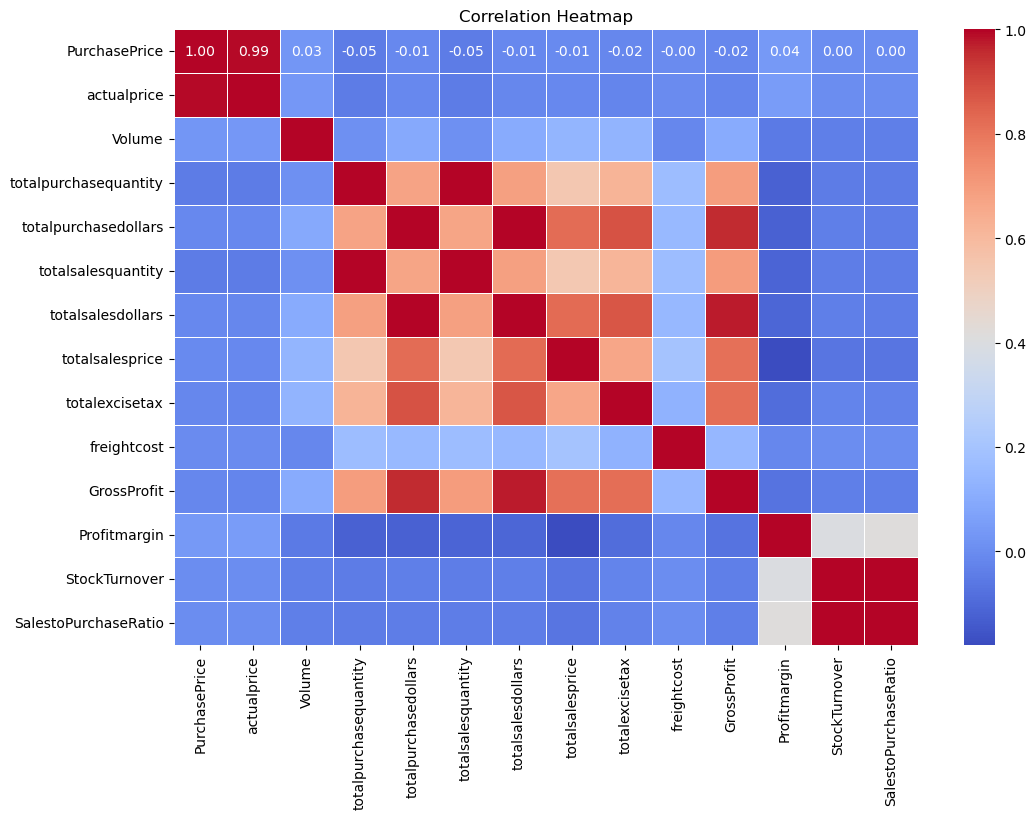

In [37]:
# Correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5 )
plt.title("Correlation Heatmap")
plt.show()

Correlation insights


Data Analysis


Identify brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margins
    

In [40]:
brand_performance = df.groupby('Description').agg(
    {'totalsalesdollars':'sum',
     'Profitmargin':'mean'}).reset_index()
brand_performance

,Description,totalsalesdollars,Profitmargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [41]:
low_sales_threshold = brand_performance['totalsalesdollars'].quantile(0.15)
high_margin_threshold = brand_performance['Profitmargin'].quantile(0.85)

In [42]:
low_sales_threshold

560.299

In [43]:
high_margin_threshold

64.97017552750113

In [48]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['totalsalesdollars'] <= low_sales_threshold) &
    (brand_performance['Profitmargin'] >= high_margin_threshold)
]
print("Brands with low sales but High Profit Margins:")
display(target_brands.sort_values('totalsalesdollars'))

Brands with low sales but High Profit Margins:


,Description,totalsalesdollars,Profitmargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [54]:
brand_performance=brand_performance[brand_performance['totalsalesdollars']<1000] #for better visualization

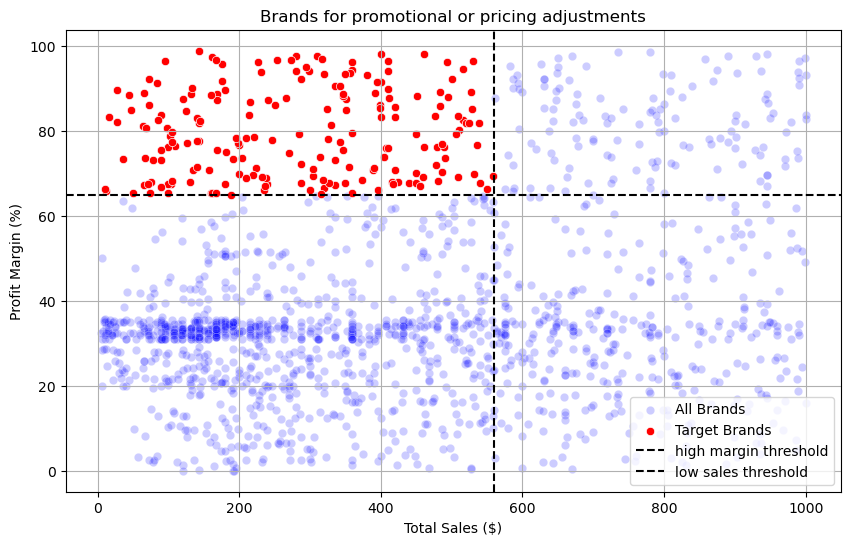

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='totalsalesdollars',y='Profitmargin', color='blue', label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='totalsalesdollars', y='Profitmargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='high margin threshold')
plt.axvline(low_sales_threshold,linestyle='--', color='black', label='low sales threshold' )

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional or pricing adjustments")
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrate the highest sales performance?


In [69]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}k"
    else:
        return str(value)

In [70]:
# top vendors and brands by Sales performance
top_vendors = df.groupby("VendorName")['totalsalesdollars'].sum().nlargest(10)
top_brands = df.groupby("Description")['totalsalesdollars'].sum().nlargest(10)
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: totalsalesdollars, dtype: float64

In [71]:
top_brands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: totalsalesdollars, dtype: object

[<BarContainer object of 10 artists>]


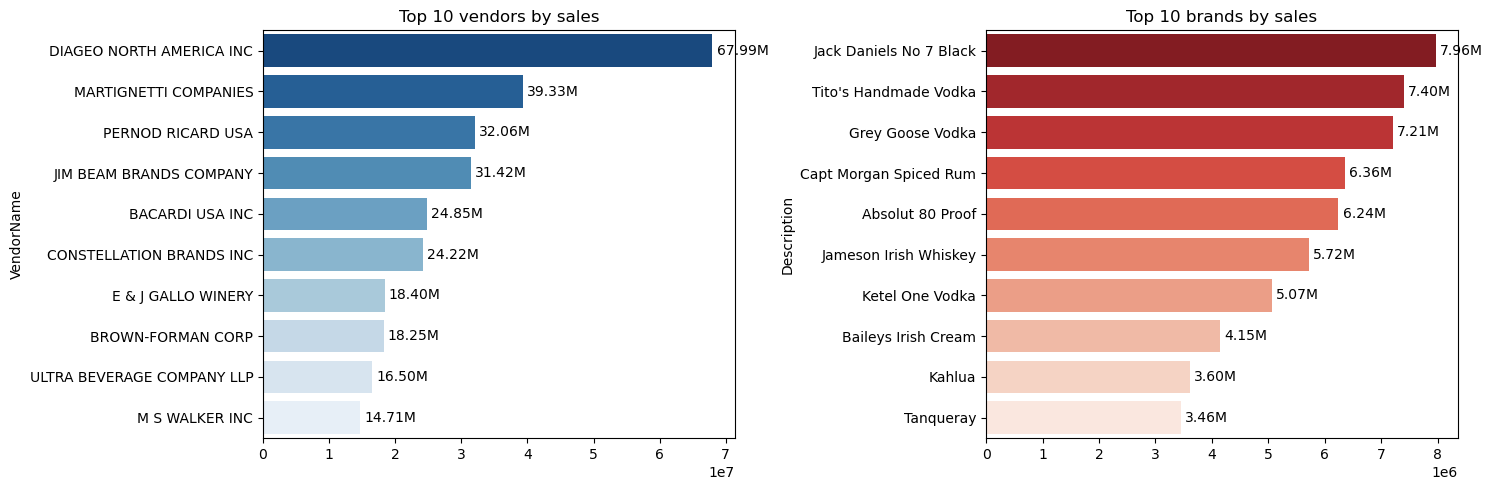

In [ ]:
plt.figure(figsize=(15,5))

# Plot for Top Vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 vendors by sales")
# Add labels automatically
ax1.bar_label(ax1.containers[0], 
              labels=[format_dollars(v) for v in top_vendors.values], 
              label_type='edge', 
              padding=3, fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index, x=top_brands.values, palette="Reds_r")
plt.title("Top 10 brands by sales")

# Add labels automatically
ax2.bar_label(ax2.containers[0], 
              labels=[format_dollars(v) for v in top_brands.values], 
              label_type='edge', 
              padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()


Which vendors contribute the most to total purchase dollars?

In [84]:
vendor_performance = df.groupby("VendorName").agg({
    'totalpurchasedollars' : 'sum',
    'GrossProfit': 'sum',
    'totalsalesdollars':'sum'
}).reset_index()
vendor_performance

,VendorName,totalpurchasedollars,GrossProfit,totalsalesdollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [165]:
vendor_performance['PurchaseContribution%'] = vendor_performance['totalpurchasedollars']/vendor_performance['totalsalesdollars'].sum()*100

In [166]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending= False), 2)
vendor_performance

,VendorName,totalpurchasedollars,GrossProfit,totalsalesdollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,11.35
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,5.78
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,5.40
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,5.32
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,3.95
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [167]:
# Display top 10 vendors
top_vendors=vendor_performance.head(10)
top_vendors['totalsalesdollars'] = top_vendors['totalsalesdollars'].apply(format_dollars)
top_vendors['totalpurchasedollars'] = top_vendors['totalpurchasedollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,totalpurchasedollars,GrossProfit,totalsalesdollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,11.35
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,5.78
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,5.40
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,5.32
6,BACARDI USA INC,17.43M,7.42M,24.85M,3.95
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,3.46
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,3.00
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,2.73
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,2.53
53,M S WALKER INC,9.76M,4.94M,14.71M,2.21


In [168]:
top_vendors['PurchaseContribution%'].sum()

45.730000000000004

In [170]:
top_vendors["Cumulative_Contribution%"]=(
    top_vendors['PurchaseContribution%'].cumsum() 
)
top_vendors

,VendorName,totalpurchasedollars,GrossProfit,totalsalesdollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,11.35,11.35
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,5.78,17.13
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,5.40,22.53
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,5.32,27.85
6,BACARDI USA INC,17.43M,7.42M,24.85M,3.95,31.80
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,3.46,35.26
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,3.00,38.26
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,2.73,40.99
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,2.53,43.52
53,M S WALKER INC,9.76M,4.94M,14.71M,2.21,45.73


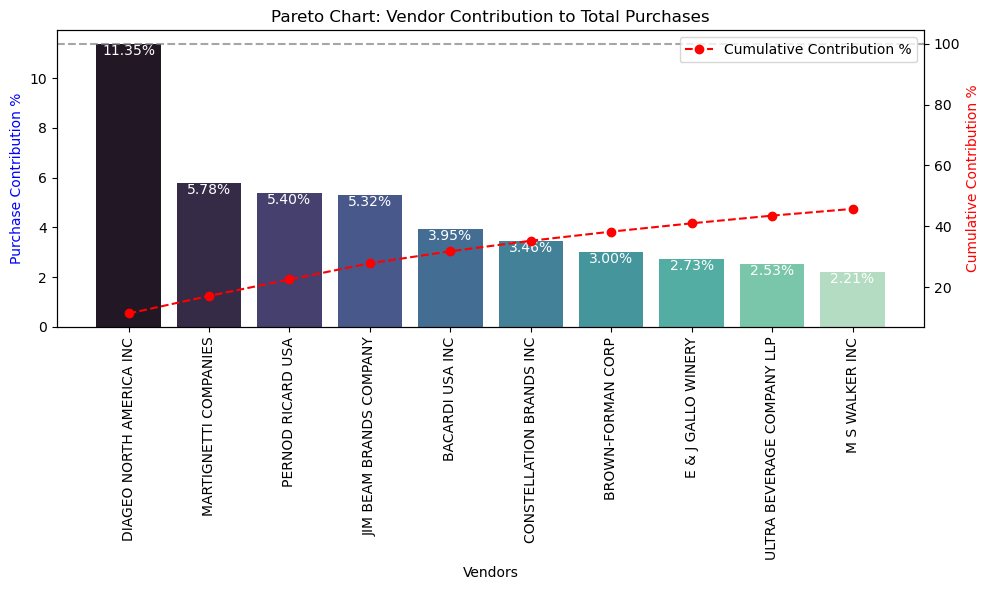

In [171]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for purchase contribution
sns.barplot(x=top_vendors['VendorName'], 
            y=top_vendors['PurchaseContribution%'], 
            palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value, f"{value:.2f}%", ha='center', va='top', fontsize=10, color='white')

# Line plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], 
         top_vendors['Cumulative_Contribution%'], 
         color='red', marker='o', linestyle='dashed', 
         label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Reference line at 100%
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


How much of total procurement is dependent on the top vendors?

In [173]:
print(f"Total Purchase contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

# top_vendors['PurchaseContribution%'].sum()

Total Purchase contribution of top 10 vendors is 45.73%


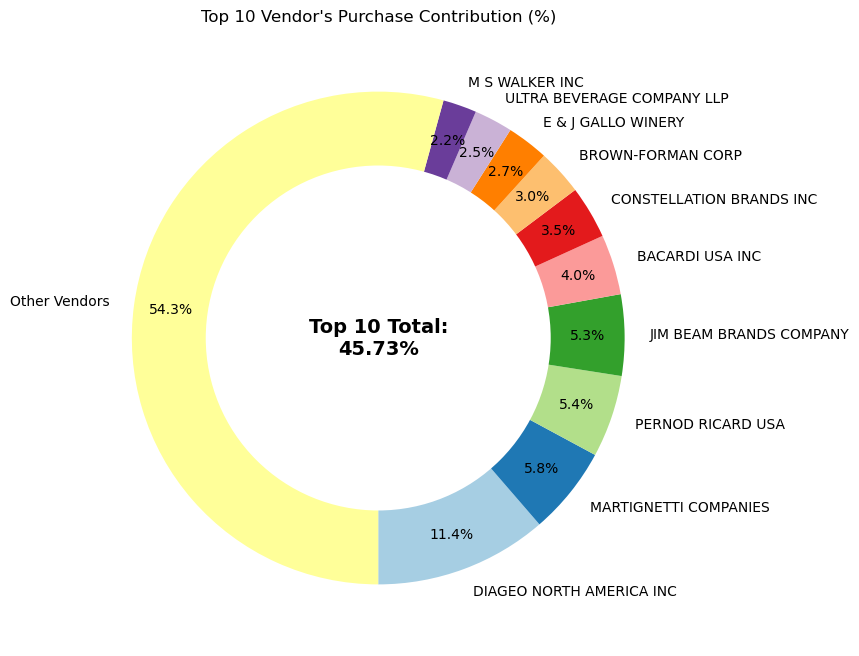

In [187]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contributions = 100 - total_contribution
total_contribution

# Append "Other Vendors" Category
vendors.append('Other Vendors')
purchase_contributions.append(remaining_contributions)
purchase_contributions

# Donut chart
fig,ax=plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=270, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle= plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add total contribution annotation in the center
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [189]:
df['UnitPurchasePrice']= df['totalpurchasedollars']/df['totalpurchasequantity']
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actualprice,Volume,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,GrossProfit,Profitmargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128.0,BROWN-FORMAN CORP,1233.0,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425.0,MARTIGNETTI COMPANIES,3405.0,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035.0,PERNOD RICARD USA,8068.0,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960.0,DIAGEO NORTH AMERICA INC,4261.0,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960.0,DIAGEO NORTH AMERICA INC,3545.0,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89


In [191]:
df['OrderSize'] = pd.qcut(df['totalpurchasequantity'], q=3, labels=("Small", "Medium", "Large"))
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actualprice,Volume,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,GrossProfit,Profitmargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128.0,BROWN-FORMAN CORP,1233.0,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425.0,MARTIGNETTI COMPANIES,3405.0,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,17035.0,PERNOD RICARD USA,8068.0,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3960.0,DIAGEO NORTH AMERICA INC,4261.0,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,3960.0,DIAGEO NORTH AMERICA INC,3545.0,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large


In [194]:
df[['OrderSize','totalpurchasequantity']]

,OrderSize,totalpurchasequantity
0,Large,145080.0
1,Large,164038.0
2,Large,187407.0
3,Large,201682.0
4,Large,138109.0
...,...,...
8559,Small,2.0
8560,Small,6.0
8561,Small,2.0
8562,Small,1.0


In [210]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


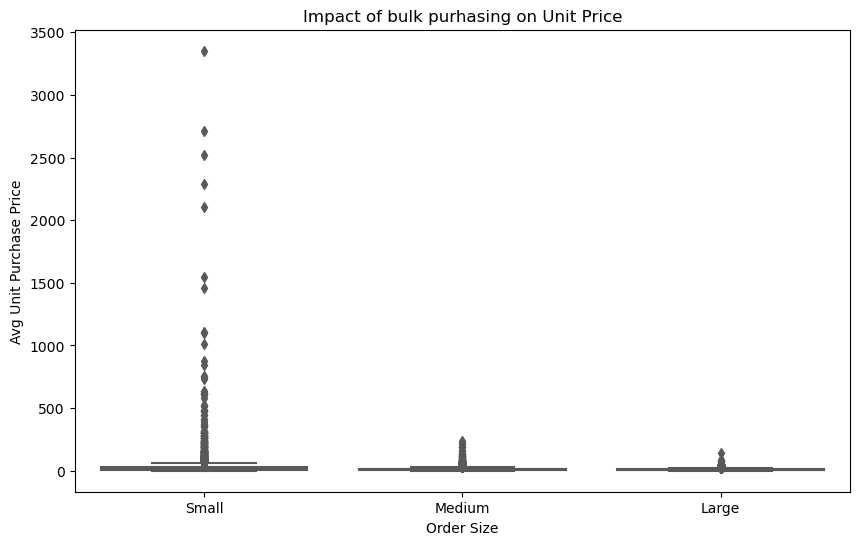

In [197]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df,x="OrderSize", y="UnitPurchasePrice", palette='Set2')
plt.title("Impact of bulk purhasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Avg Unit Purchase Price")
plt.show()

1. Vendors buying in bulk(Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margin if they can manage inventory efficiently.

2. The price difference between small and large orders is substantial.

3. This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue

Which vendor have lower inventory turnover, indicating excess stock and slow-moving projects?

In [208]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actualprice,Volume,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,GrossProfit,Profitmargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128.0,BROWN-FORMAN CORP,1233.0,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425.0,MARTIGNETTI COMPANIES,3405.0,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,17035.0,PERNOD RICARD USA,8068.0,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3960.0,DIAGEO NORTH AMERICA INC,4261.0,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,3960.0,DIAGEO NORTH AMERICA INC,3545.0,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large


In [207]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [217]:
# df.head()
df['UnsoldInventoryValue']=(df['totalpurchasequantity'] - df['totalsalesquantity']) * df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [227]:
# Aggregate capital locked per vendor
inventory_value_per_vendor = df.groupby("VendorName")[['UnsoldInventoryValue']].sum()
inventory_value_per_vendor = inventory_value_per_vendor.sort_values("UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor

,UnsoldInventoryValue
VendorName,
DIAGEO NORTH AMERICA INC,722209.05
JIM BEAM BRANDS COMPANY,554665.63
PERNOD RICARD USA,470625.61
WILLIAM GRANT & SONS INC,401960.83
E & J GALLO WINERY,228282.61
...,...
SOUTHERN WINE & SPIRITS NE,-71058.27
M S WALKER INC,-102891.05
MARTIGNETTI COMPANIES,-112538.34
